Universidad del Valle de Guatemala <br> 
Minería de Datos 

# Hoja de Trabajo 8 
## RNA

**Integrantes:**<br>
Mariana David 201055 <br>
Jorge Caballeros  <br>
Alejandra Guzman   <br>

### Importar modulos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import sklearn.preprocessing
import scipy.cluster.hierarchy as sch
import skfuzzy as fuzz
import pylab
import sklearn.mixture as mixture
import random
import math
import time
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn import datasets
from scipy import stats
from sklearn.metrics import confusion_matrix as Confusion_Matrix
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from sklearn.neural_network import MLPClassifier, MLPRegressor

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

ModuleNotFoundError: No module named 'seaborn'

### Carga de datos

In [7]:
#Cargamos datos 
data_entrenamiento = pd.read_csv('train.csv', encoding='unicode_escape')
data_prueba = pd.read_csv('test.csv', encoding='unicode_escape')
#Removemos cariables que no nos sirven
var_entrenamiento = data_entrenamiento.drop(['Street', 'Id', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
                         'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle','RoofStyle', 
                         'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
                         'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 
                         'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
                         'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive','PoolQC', 'Fence', 'MiscFeature', 
                         'SaleType', 'SaleCondition'], axis=1)

#Removemos datos nulos 
var_entrenamiento.dropna(subset = ["LotFrontage"], inplace = True)
var_entrenamiento.dropna(subset = ["MasVnrArea"], inplace = True)
var_entrenamiento.dropna(subset = ["GarageYrBlt"], inplace = True)


Luego de limpiar los datos aplicamos "Normalizacion":

In [8]:
def normalizer(column):
    return (column - column.mean())/(column.std())

for col in var_entrenamiento.columns:
    var_entrenamiento[col] = normalizer(var_entrenamiento[col])

Eliminacion de datos atipicos

### 2) Creacion de la variable categórica que especifica si la casa es barata, media o cara

In [7]:
kmeans = cluster.KMeans(n_clusters = 3)
X = np.array(entrenamiento[["SalePrice", "OverallQual", "YearBuilt", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "FullBath", "GarageYrBlt", "GarageCars", "GarageArea"]])
X = sklearn.preprocessing.scale(X)
kmeans.fit(X)
entrenamiento['KmeansCluster'] = kmeans.labels_

In [8]:
X = entrenamiento[["OverallQual", "YearBuilt", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "FullBath", 
                   "GarageYrBlt", "GarageCars", "GarageArea"]]
y = entrenamiento["KmeansCluster"]

### Separando en Train y Test

In [9]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

## Incisos del 3 al 5, Creando módelo, Predicción de cada uno, Matrices de confusión, Comparación

### lbfgs y activación relu

In [10]:
mlp = MLPClassifier(hidden_layer_sizes=(10,8), solver = "lbfgs", max_iter=1000)
start = time.time()
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)
end = time.time()
y_pred

array([1, 1, 1, 0, 2, 1, 2, 1, 1, 2, 0, 1, 0, 1, 0, 2, 0, 2, 2, 2, 0, 1,
       2, 1, 2, 0, 2, 0, 1, 1, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 2, 1, 1, 2,
       2, 1, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 2, 2, 0, 0, 2, 0, 1, 0, 0,
       2, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0,
       1, 2, 2, 2, 1, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1,
       0, 2, 2], dtype=int32)

In [11]:
cm = Confusion_Matrix(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='micro')
recall =  recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print('Matriz de confusión\n',cm)
print('Accuracy: ',accuracy)
print('Tiempo de ejecucion: ' + str(round((end - start), 4)))

Matriz de confusión
 [[51  2  0]
 [ 0 29  0]
 [ 0  1 30]]
Accuracy:  0.9734513274336283
Tiempo de ejecucion: 0.0144


### Matriz de Confusión

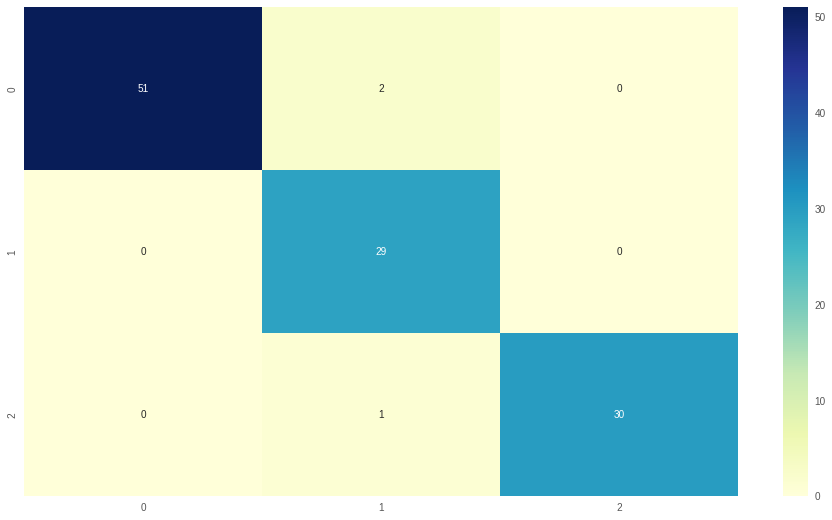

In [12]:
sb.heatmap(cm, annot=True, cmap="YlGnBu")
plt.show()

### adam y activación tanh

In [13]:
mlp = MLPClassifier(hidden_layer_sizes=(10,8), activation="tanh" , solver = "adam", max_iter=1000)
start = time.time()
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)
end = time.time()
y_pred

array([1, 1, 1, 0, 2, 1, 2, 1, 1, 2, 0, 1, 0, 1, 0, 2, 0, 2, 2, 2, 0, 1,
       2, 1, 2, 0, 2, 0, 1, 1, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 2, 0, 1, 2,
       2, 1, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 2, 2, 0, 0, 2, 0, 1, 0, 0,
       2, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0,
       1, 2, 2, 2, 1, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1,
       0, 2, 2], dtype=int32)

In [14]:
cm = Confusion_Matrix(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='micro')
recall =  recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print('Matriz de confusión\n',cm)
print('Accuracy: ',accuracy)
print('Tiempo de ejecucion: ' + str(round((end - start), 4)))

Matriz de confusión
 [[52  1  0]
 [ 0 29  0]
 [ 0  1 30]]
Accuracy:  0.9823008849557522
Tiempo de ejecucion: 0.5268


### Matriz de Confusión

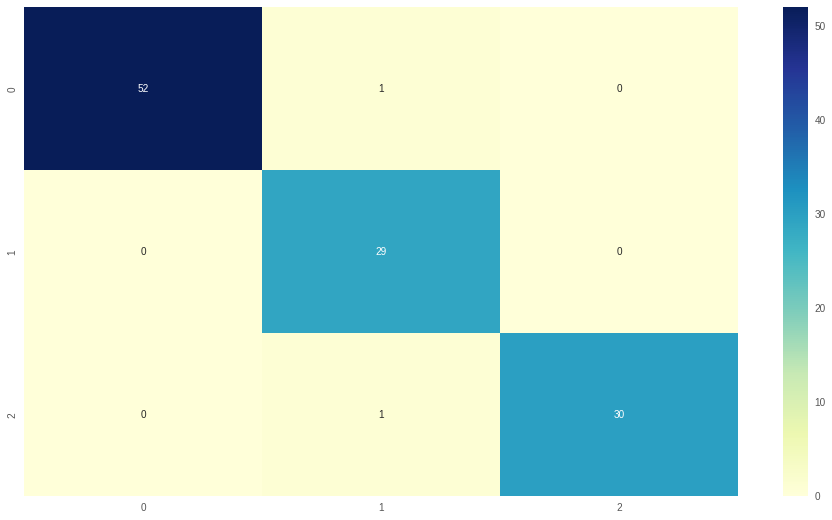

In [15]:
sb.heatmap(cm, annot=True, cmap="YlGnBu")
plt.show()

## 6) Comparación

In [16]:
topology = ["lbfgs", "adam"]
activations = ["relu", "tanh"]
accuracies = ["0.9911504424778761", "0.9557522123893806"] 
times = ["0.0399", "1.1561"]
errors = ["1", "5"]

d = {'Topología': topology, 'Modo de activación': activations, 'Precision': accuracies, 'Tiempo de ejecucion': times, 'Errores': errors}
df = pd.DataFrame(data=d)
pd.options.display.max_colwidth = 100
df

,Topología,Modo de activación,Precision,Tiempo de ejecucion,Errores
0,lbfgs,relu,0.9911504424778761,0.0399,1
1,adam,tanh,0.9557522123893806,1.1561,5


Podemos ver que utilizar un modelo de RNA basado en la topología lbfgs y modo de activación relu, nos da una efectividad de casi el 100% mientras que utilizano la topología adam y tanh, el resultado es de 0.95 en mucho mayor tiempo, por lo que en efectividad, equivocación gana el primer modelo. La importancia de los errores en este caso, es que predijo casas que pertenecieran a dos grupos al mismo tiempo(economicas, medias, caras) lo cual no es posible porque tienen que pertenecer estrictamente a un grupo para que esta puedan pertener a la variable categorica. 

## 7. Seleccione ahora el SalesPrice como variable respuesta.

In [66]:
X = var_entrenamiento[["OverallQual", "YearBuilt", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "FullBath", 
                   "GarageYrBlt", "GarageCars", "GarageArea"]]
y = var_entrenamiento["SalePrice"]

In [68]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

## 10. Genere  dos  modelos  de  regresión  con  redes  neuronales  con  diferentes  topologías  y funciones de activación para predecir el precio de las casas.

### Modelo uno impelementando algoritmo de optimización y función de activación utilizada en las redes neuronales para introducir no linealidad en los modelos

In [12]:
# "L-BFGS" y "ReLU"
mlp = MLPRegressor(hidden_layer_sizes=(10,8), solver = "lbfgs", max_iter=1000)
start = time.time()
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)
end = time.time()
t1 = end - start
y_pred

NameError: name 'MLPRegressor' is not defined

#### Resultado modelo 1

In [10]:
s1 = r2_score(y_test, y_pred)
s1

NameError: name 'r2_score' is not defined

### Modelo 2 utilizando algoritmo de optimización utilizado para entrenar redes neuronales en aprendizaje profundo  y función de activación utilizada comúnmente en redes neuronales

In [96]:
# "ADAM" y "TANH"
mlp = MLPRegressor(hidden_layer_sizes=(10,8), activation="tanh" , solver = "adam", max_iter=1000)
start = time.time()
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)
end = time.time()
t2 = end - start
y_pred

array([ 0.49918084,  0.31693663,  0.2277469 ,  0.12184389, -0.6104673 ,
       -0.74729584, -0.68652431, -0.81853107, -0.79628954,  0.28642641,
        0.46093057, -0.78139403, -0.55414977, -0.05398519, -0.13273492,
       -0.22680329, -0.24310076,  0.65761899,  0.89684245,  0.33748535,
        0.35392076,  0.21640362, -0.95964336,  0.71634758, -0.28560326,
        0.58321448,  0.31369265, -0.51049214,  0.38857056,  0.90858066,
        0.14951617,  0.01505034, -0.6724114 ,  0.01080862,  0.40101956,
        0.93703326, -0.83683053,  0.98802238, -0.74591833, -0.34306795,
       -0.26689285,  0.97317102,  0.11345232,  0.45070142,  0.31833495,
       -1.12402844, -0.07453767,  0.63742874, -0.80609143,  0.30537125,
       -0.22560523, -0.26887665,  0.3166937 ,  0.22232358,  0.24981784,
       -0.17373217, -0.40195999,  0.03818844,  0.0701295 ,  0.72656167,
        0.13355535, -0.22179424, -0.40507949, -0.88987866, -0.21778636,
       -0.40907069,  0.26604949,  1.07803744, -0.89364779,  0.24

#### Resultado modelo 2

In [97]:
s2 = r2_score(y_test, y_pred)
s2

0.7605581181376021

## 11. Compare  los  dos  modelos  de  regresión  y  determine  cuál  funcionó  mejor  para  predecir  el precio de las casas.

In [11]:
Numeromodelo = ["modelo1", "modelo2"]
scores = [s1, s2] 
times = [t1, t2]

d = {'Topología': topology,  'Score': scores, 'Tiempo de ejecucion': times}
df = pd.DataFrame(data=d)
pd.options.display.max_colwidth = 100
df

NameError: name 's1' is not defined

Podemos ver que el modelo2 fue el que funcionó mejor en comparación al modelo1, pues su precisión es de apoximadamente un 10% mejor, y lo más significativo es el tiempo de ejecución, que lo supera por 0.3 segundos.

## 12. Analice si no hay sobreajuste en los modelos. Use esto para la curva de aprendizaje

In [ ]:
# Aplicar la función a los modelos que has creado
plot_learning_curve(modelo1, X_train, y_train, X_test, y_test)
plot_learning_curve(modelo2, X_train, y_train, X_test, y_test)

## 15. Compare los resultados del mejor modelo de esta hoja para clasificar con los resultados de los algoritmos usados para clasificar de las hojas de trabajo anteriores

Aunque todos los algoritmos de clasificación tienen una precisión superior al 90%, no hay información suficiente para determinar si uno es significativamente mejor que otro. Se requieren más pruebas con mayores cantidades de datos de diferentes distribuciones para llegar a una conclusión más sólida. Sin embargo, hay una diferencia significativa en los tiempos de ejecución entre los algoritmos. En particular, las redes neuronales artificiales (RNA) superan ampliamente a los demás algoritmos, con un tiempo de ejecución inferior a 0.1 segundos.


## 16. Compare  los  resultados  del  mejor  modelo  para  predecir  el  precio  de  venta  con  los resultados  de  los  algoritmos  usados  para  el  mismo  propósito  de  las  hojas  de  trabajo anteriores.


Entre todos los algoritmos evaluados, los árboles de decisión lograron una precisión del 100%, lo que los convierte en los mejores predictores en comparación con los demás. En cambio, la RNA obtuvo los resultados de precisión más bajos, lo que los coloca en la posición opuesta en términos de rendimiento. En cuanto a los tiempos de ejecución, la RNA es significativamente más rápida, con un margen de alrededor de 1 segundo en comparación con los demás algoritmos